<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/Parcial2/Punto2_Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Instalamos las librerias necesarias
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf
import pandas as pd
import matplotlib as mpl
import yt_dlp as youtube_dl
import subprocess

In [ ]:
# @title Definimos la funcion de descarga del video
def descarga(video_url,name):
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

In [ ]:
# @title Ingreso de la cancion y toma de la muestra
CAC = input("Ingrese el link de su cancion favorita: ")
descarga(CAC,'Cancion')

subprocess.call(['ffmpeg','-y', '-i', 'Cancion'+'.mp3',
                   'Cancion'+'.wav'])

plc = np.array([20])    # El punto de lectura de la canción ingresada será en 20 segundos
tm = 5    #segundos de muestra
fs = 48000    #frecuencia de muestreo de un video en youtube
t = np.arange(0,5,1/fs)   #vector de tiempo
XC = np.zeros((1, int(tm * fs), 2))

x, fs = sf.read('/content/Cancion.wav')
for i,ti in enumerate(plc):
  XC[i] = x[int(fs*ti):int(fs*(ti+tm)),:] #aquí se crea la muestra de 5s de la cancion ingresada

XC1 = XC.mean(axis=-1).T

Ingrese el link de su cancion favorita: https://www.youtube.com/watch?v=Sbk-m7si7Lg
[youtube] Extracting URL: https://www.youtube.com/watch?v=Sbk-m7si7Lg
[youtube] Sbk-m7si7Lg: Downloading webpage
[youtube] Sbk-m7si7Lg: Downloading ios player API JSON
[youtube] Sbk-m7si7Lg: Downloading android player API JSON
[youtube] Sbk-m7si7Lg: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=Sbk-m7si7Lg
[youtube] Sbk-m7si7Lg: Downloading webpage
[youtube] Sbk-m7si7Lg: Downloading ios player API JSON
[youtube] Sbk-m7si7Lg: Downloading android player API JSON
[youtube] Sbk-m7si7Lg: Downloading m3u8 information
[info] Sbk-m7si7Lg: Downloading 1 format(s): 251
[download] Cancion.mp3 has already been downloaded
[download] 100% of    2.78MiB


In [ ]:
# @title Definicion señal portadora
Ap = float(max(abs(XC1)))    #considerando Im=1
SP = Ap*np.cos(2*np.pi*15000*t)

In [ ]:
# @title Modulacion de la señal
MOD = (1+XC1[:,0]/Ap)*SP
#plt.plot(t,MOD)

In [ ]:
# @title Transformadas de Fourier de las señales

VF = np.fft.rfftfreq(len(SP),1/fs)    #vector de frecuencias
TE = np.fft.rfft(XC1[:,0])    #transformada de la entrada
TP = np.fft.rfft(SP)    #transformada portadora
TM = np.fft.rfft(MOD)   #transformada modulacion

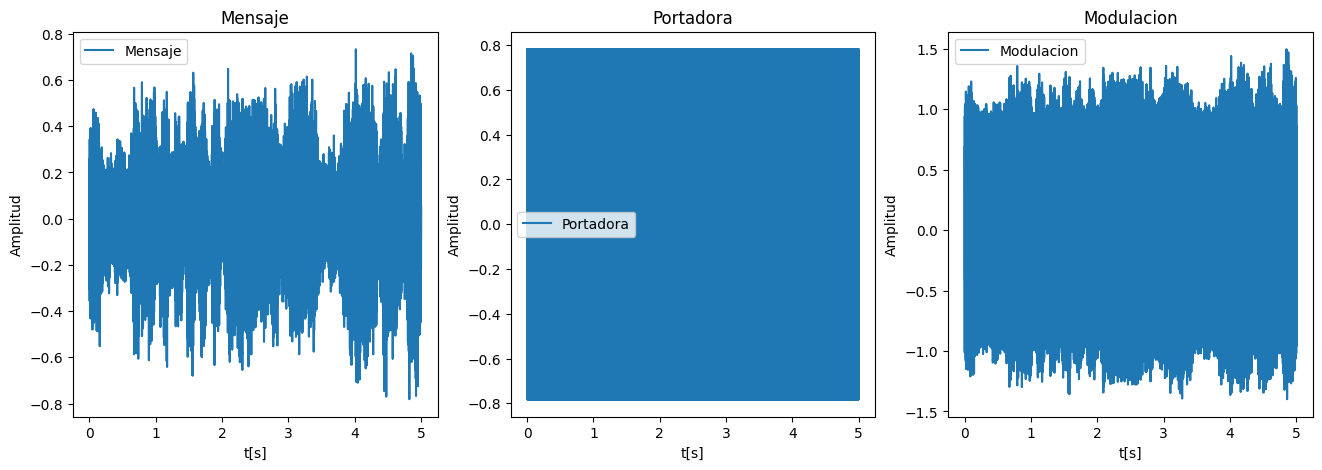

In [ ]:
# @title Gráficas en el tiempo

plt.figure(figsize=(16,5))

plt.subplot(131)
plt.title('Mensaje')
plt.plot(t,XC1,label='Mensaje')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(132)
plt.title('Portadora')
plt.plot(t,SP,label='Portadora')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(133)
plt.title('Modulacion')
plt.plot(t,MOD,label='Modulacion')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


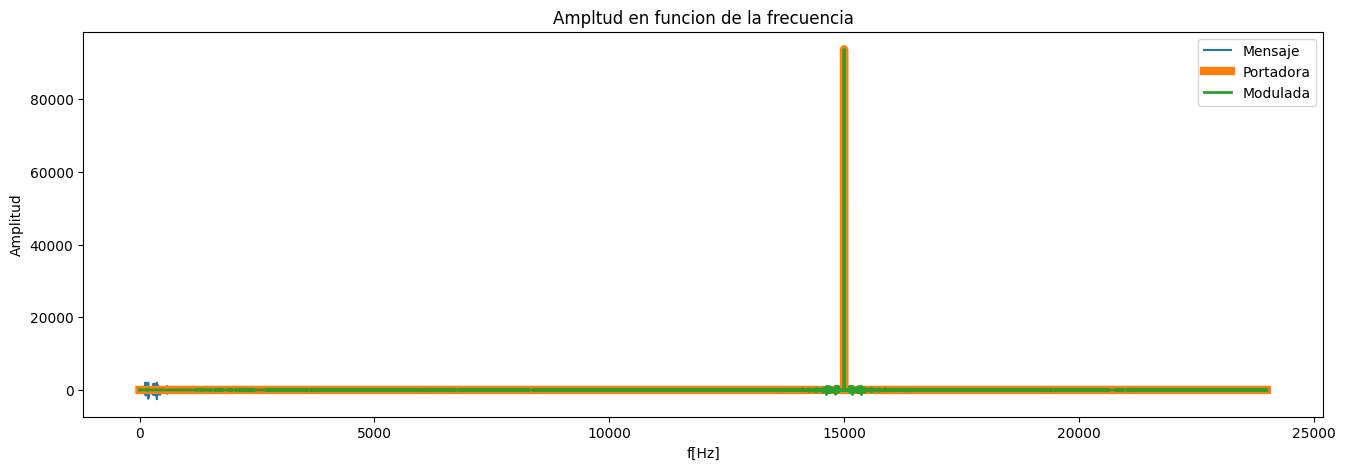

In [ ]:
# @Gráficas en la frecuencia

plt.figure(figsize=(16,5))
plt.plot(VF,TE,label='Mensaje')
plt.plot(VF,TP,label='Portadora',linewidth=6)
plt.plot(VF,TM,label='Modulada',linewidth=2)
plt.title('Ampltud en funcion de la frecuencia')
plt.xlabel('f[Hz]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [ ]:
Audio(XC1.T,rate=fs)

In [ ]:
Audio(SP,rate=fs)

In [ ]:
Audio(MOD,rate=fs)